# TAREA-08  Análisis del calentamiento global

**Introducción**

El calentamiento global ha llegado a ser un tema importante en los últimos años. El debate sobre el calentamiento global también se ha extendido por todo el mundo. La visualización de la temperatura en la Tierra ha llegado a ser uno de los argumentos más importantes en las conversaciones, por lo que es hora de "trazar" algunos datos.

**Desarrollo**

En esta tarea utilice el código siguiente para analizar las temperaturas promedio en los países. Conforme vaya obteniendo las gráficas mostradas, realice las siguientes actividades solicitadas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:228: RuntimeWarning:

scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject



In [2]:
global_temp_country = pd.read_csv('Temperatures.csv')

**Mapeo de temperaturas medias en los países**

In [3]:
# Eliminemos los países duplicados (en el análisis no consideramos la presencia de
# colonias en estos países) y países para los que no hay información sobre la temperatura

global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

# Temperatura promedio para cada país
countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == 
                                               country]['AverageTemperature'].mean())


data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Temperatura\nPromedio,\n°C')
            )
        ]

layout = dict(
    title = 'Temperatura media de los países en la Tierra',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)', #color del oceano
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,  #Longitud
                    lat = 10), #Latitud
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)' #color del eje de Longitud
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)' #color del eje de Latitud
                )
              ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

# ACTIVIDAD 1

- De acuerdo con la gráfica anterior, y una visualización preliminar, mencione algunos ejemplos de países que tengan temperaturas promedio bajas (como Canadá).

Como era de esperarse la mayoria de los países con temperaturas en promedio bajas, se encuentran en el hemisferio norte del planeta. Países como: Canadá, Groenlandia, Rusia, Isladia, Finlandia, Noruega, Suecia y Mongolia. Auqnue este último debe sus bajas temperaturas a su caracteristicas geográficas.

- ¿Dónde es la temperatura más baja? (es claramente visible en el mapa).

Siguiendo la escala de color del mapa, ese país sería **Groenlandia**.

- De acuerdo con esta visualización preliminar ¿Dónde es el país más cálido?

Es dificl estar del todo seguro, debido a que la mayoria de los paises cercanos al ecuador y a los tropicos cuentan con temperaturas altas en promedio. Auqnue haciendo una exploración rápida podemos decir que es **Mali**.

# ACTIVIDAD 2
- Ordene los países por temperatura promedio y trace una gráfica de barras horizontal

In [29]:
#mean_temp
#countries

temps = pd.DataFrame({'Pais': countries, 'temp': mean_temp})
temps = temps.sort_values('temp', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
temps = temps.set_index('Pais')

temp    float64
dtype: object

In [39]:
for index, value in enumerate(temps): 
    print(value)

temp


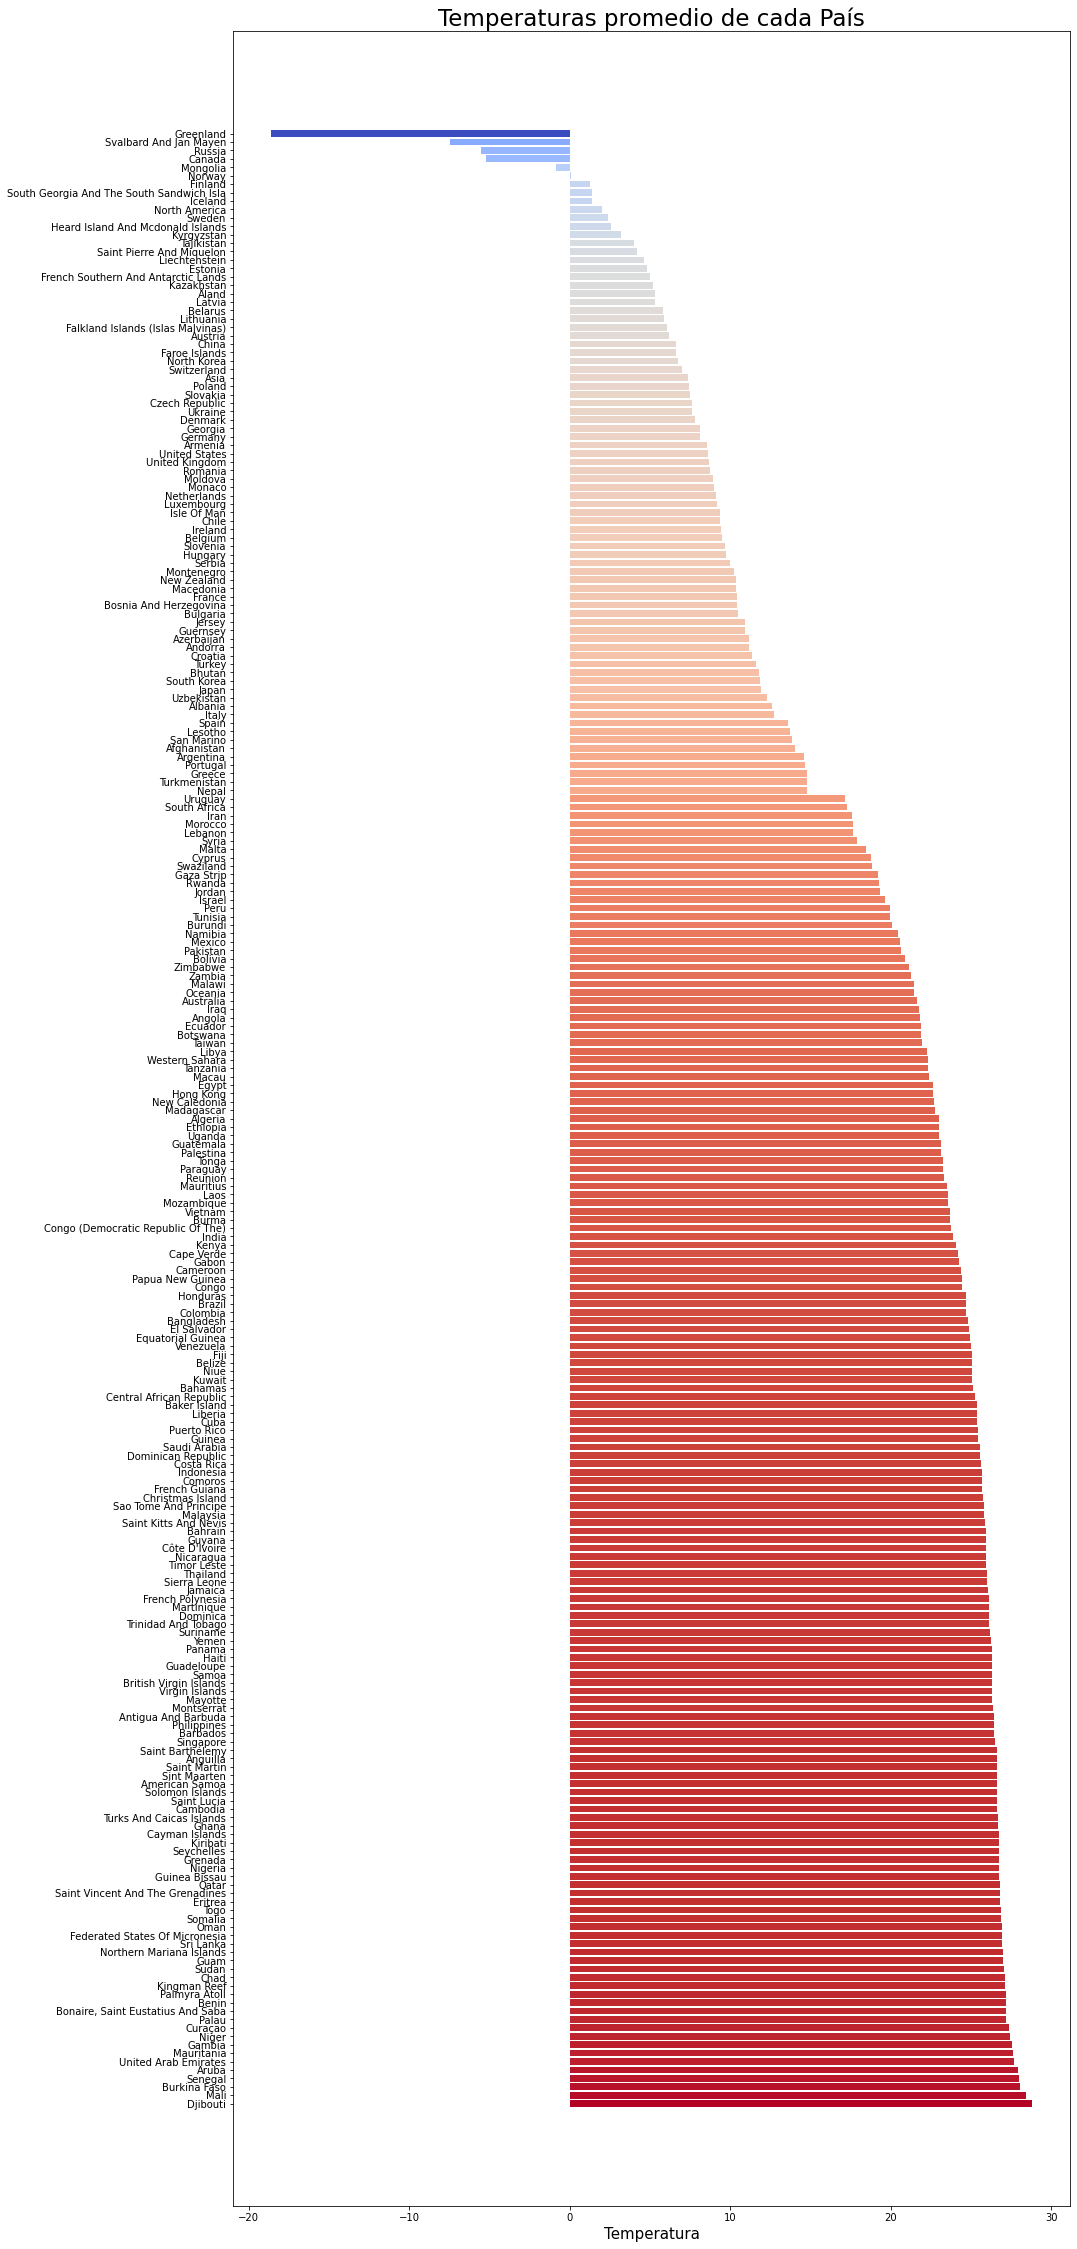

In [60]:
my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.rcParams["figure.figsize"] = (15,40)

plt.barh(temps.index, temps.temp, color=my_cmap(rescale(temps['temp'])))
# generar trama
plt.xlabel('Temperatura', size = 15)
plt.title('Temperaturas promedio de cada País', size = 23)

# anotar etiquetas de valor para cada país
plt.show() 

**Leamos los datos del archivo "GlobalTemperatures.csv", que tiene la temperatura mensual de la Tierra, y grafiquémosla**.

In [4]:
global_temp = pd.read_csv('GlobalTemperatures.csv')

# Extraer el año de una fecha
years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp[global_temp['dt'].apply(
                lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='max',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='min',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Temperatura media',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='Año'),
    yaxis=dict(title='Temperatura media, °C'),
    title='Temperatura promedio de la Tierra',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# ACTIVIDAD 3

- De acuerdo a los gráficos ¿Se puede considerar que hay calentamiento global en los últimos años? Describa brevemente. 

Conforme se hace más precisa la medición de la temperatura del planeta, podemos ver que en efecto, la tendencia de la temperatura aumenta en las últimas décadas de forma consistente en el aspecto general, pues como era de esperarse, al ser un valor muy variable, depediente de muchos factores que hace que sea muy volatil. Por lo que sí, podemos decir que en las últimas décadas la te peratura global del planeta ha aumentado.

- ¿A partir de qué fecha, la superficie terrestre empieza a tener los valores más altos de temperatura?. 

Es dificil decirlo debido a las variaciones tan importantes que hay en los primero registros. Sin embargo, desde finales de la decada de 1880, se pueden ver como las variaciones son menores, y por lo tanto podemos percibir la tendencia de aumento, auqnue no es hasta la década de 1970 que es claro.

**Veamos el gráfico de cambios de temperatura anuales en ciertos continentes (supongamos que tomamos en consideración un país por continente)**.

In [5]:
continent = ['Russia', 'United States', 'Niger', 'Greenland', 'Australia', 'Bolivia']
mean_temp_year_country = [ [0] * len(years[70:]) for i in range(len(continent))]
j = 0
for country in continent:
    all_temp_country = global_temp_country_clear[global_temp_country_clear['Country'] == country]
    i = 0
    for year in years[70:]:
        mean_temp_year_country[j][i] = all_temp_country[all_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean()
        i +=1
    j += 1

traces = []
colors = ['rgb(0, 255, 255)', 'rgb(255, 0, 255)', 'rgb(0, 0, 0)',
          'rgb(255, 0, 0)', 'rgb(0, 255, 0)', 'rgb(0, 0, 255)']
for i in range(len(continent)):
    traces.append(go.Scatter(
        x=years[70:],
        y=mean_temp_year_country[i],
        mode='lines',
        name=continent[i],
        line=dict(color=colors[i]),
    ))

layout = go.Layout(
    xaxis=dict(title='Año'),
    yaxis=dict(title='Temperatura promedio, °C'),
    title='Temperatura media de la Tierra en los continentes',)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

# ACTIVIDAD 4

- ¿A partir de qué año se puede considerar que ha habido un aumento continuo en la temperatura media anual de los países ("continentes") que tomamos en consideración?

A partir de la década de 1980 se puede observar un aumento visible en Rusia y Groenlandia, ambos países del norte y colindantes entre ellos. En el caso de Autsralia que prácticamente conforma un continente completo, se puede observar un pequeño incremento visible en la decada de 1970; lo que támbien ocurre con los Estados Unidos. En caso de Niger, es el aumento más claro, aunque no esta claro si hay un punto en el que la temperatura a comenzado a aumentar de forma visible, aunque parece ser a comienzos de 1900. Bolivia es el país que menos claro se observa el incremento, sin embargo, se puede persibir que en la decada de 1950 comienza un pequeño aumento, sin seguir esa tendencia a la alza.

- ¿A qué se deberá la interrupción (discontinuidad) de los valores de temperatura en el gráfico?

Naturalmente, los datos son capturados por sistemas, empresas, institutos de investigación, o secretarías. El proceos de tommar las temperaturas puede llegar a requerir de mucha organización gubernamental, por lo que depende totalmente de situaciones que a veces son ajenas al proceso, lo que puede interrumpir la toma de la información, o bien generar información sin el suficiente rigor arrojando datos inconsistentes. Eso explica porque aquellos países en vías de desarrollo tardaron más en iniciar el proceso de medición de la temperatura.

# ACTIVIDAD 5

Aunque en las últimas décadas se tiene claro que hay un aumento de la temperatura, sería más fácil percibir esa diferencia de temperatura si comparamos ls diferecia respecto a una temperatura global inicial; sin embargo, esto se torna complicado debido a la viariciones de los datos al comienzo de los registros, lo que nos prohibiría poder establecer un valor específico.

La tendencia general comienza una vez expandida la revolución industrial a todo el mundo, es decir a mediados del siglo XVIII. Con esta expansión no solo aumenta la actividad industrial que desprende containantes, sino el aumento de la población, y con ellos las manchas urbanas, y el impacto en los campos para solventar esa población, así como los recursos naturales que requieren para sostenerse. Todos esos efectos tienen un impacto que ha ido en aumento desde la revolución industrial. 

![Imagen](https://i.blogs.es/b9b87b/crecimiento-poblacion/1366_2000.jpg)

Este crecimiento poblacional se da hasta mediados de la década de 1950; que justamente coicide con el inicio de la tendencia de aumento de la temperatura. Así este aumento en la temperatura se da debido a las necesidades que se requieren para sostener el estilo de vida, cada vez más complejo de la población.

La solución consiste en las mismas recomendaciones que se han hecho desde hace décadas, intentar reducir el impacto que tiene la población sobre la explotación de los recursos naturales, reciclaje y la disminución del impacto industrial, así como la deforestación para uso agrícola. Gran parte de estas soluciones, no son en escencia decisión de las personas, sino de las politicas y voluntad de los gobiernos; sin embargo, sí es nuestra obligación exigir que se lleven a cabo.